### Live Day 3 - ARIMA,SARIMAX, Fbprophet Session

In [157]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sma
from statsmodels.tsa.stattools import adfuller

In [158]:
# read the airline dataset
airline = pd.read_csv("airline_passengers.csv")
airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [159]:
# check for null values
airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [160]:
# check for last five records
airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [161]:
# drop the null values
airline.dropna(axis=0, inplace=True)

In [162]:
# check for null values
airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [163]:
# concise info of data
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [164]:
# converting Month to a datetime column
airline['Month'] = pd.to_datetime(airline['Month'])

In [165]:
# concise info of data
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [166]:
# check first five records
airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [167]:
# set Month column as index
airline.set_index('Month', inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


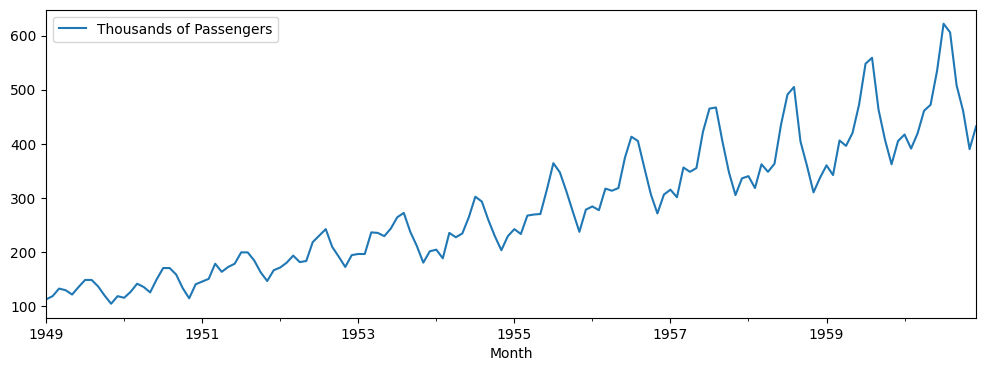

In [168]:
# plot the data
airline.plot(figsize=(12,4))
plt.show()

In [169]:
# create a function that checks the data for stationarity using dickey-fuller test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics: {}".format(result[0]))
    print("p-value: {}".format(result[1]))
    
    if result[1] < 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [170]:
# check for stationarity
adf_test(airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060482
p-value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [171]:
# create first differencing
airline['Passengers first difference'] = airline['Thousands of Passengers'] - airline['Thousands of Passengers'].shift(1)
airline.head()

,Thousands of Passengers,Passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [172]:
# let's check for stationarity
adf_test(airline['Passengers first difference'].dropna())

ADF Statistics: -2.8292668241699994
p-value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [173]:
# create second differncing
airline['Passengers second difference'] = airline['Passengers first difference'] - airline['Passengers first difference'].shift(1)
airline.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [174]:
# check for stationarity
adf_test(airline['Passengers second difference'].dropna())

ADF Statistics: -16.384231542468505
p-value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [175]:
# 12 months differencing for seasonal data
airline['Passengers 12 diffenence'] = airline['Thousands of Passengers'] - airline['Thousands of Passengers'].shift(12)
airline.head(30)

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 diffenence
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [176]:
# check for stationarity
adf_test(airline['Passengers 12 diffenence'].dropna())

ADF Statistics: -3.383020726492481
p-value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [177]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

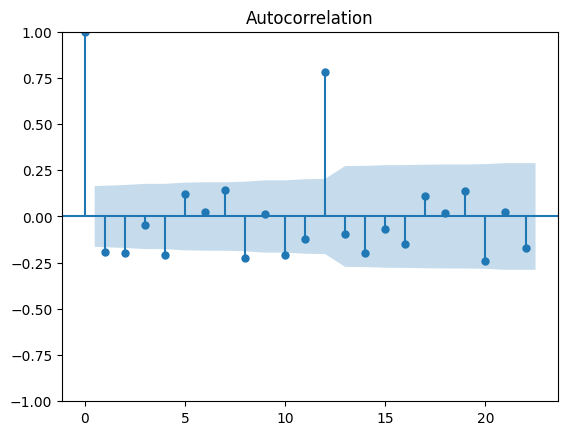

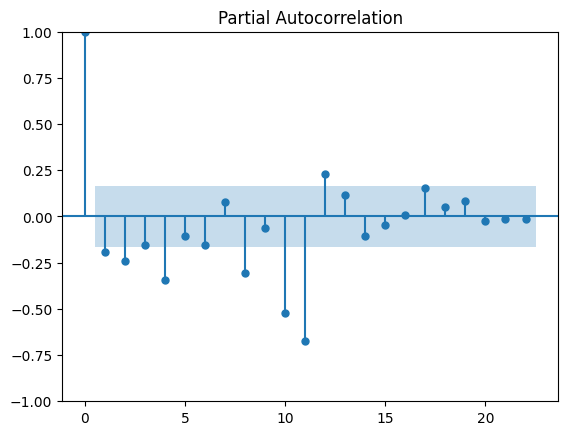

In [178]:
acf2 = plot_acf(airline['Passengers second difference'].dropna())
pacf2 = plot_pacf(airline['Passengers second difference'].dropna(),method='ywm')

d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


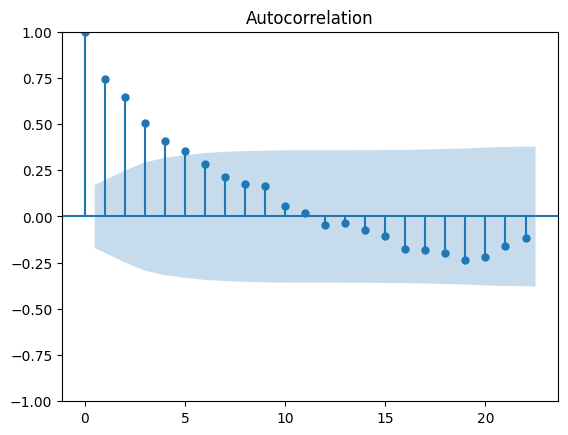

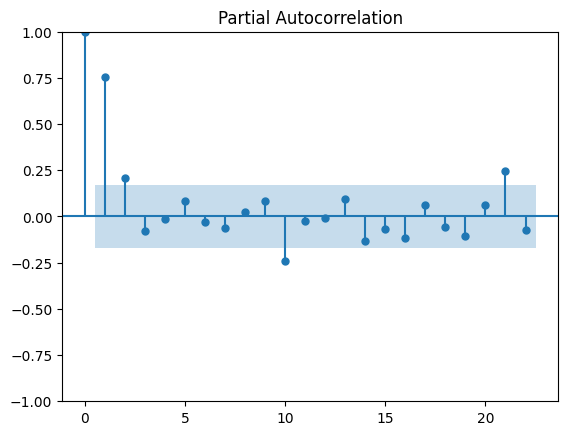

In [179]:
acf12 = plot_acf(airline['Passengers 12 diffenence'].dropna())
pacf12 = plot_pacf(airline['Passengers 12 diffenence'].dropna())

In [180]:
airline

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 diffenence
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [181]:
# train test split
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [182]:
train_data = airline[:train_dataset_end]
test_data = airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [183]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 diffenence
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [184]:
# Create Arima Model
from statsmodels.tsa.arima.model import ARIMA

In [185]:
train_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 diffenence
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


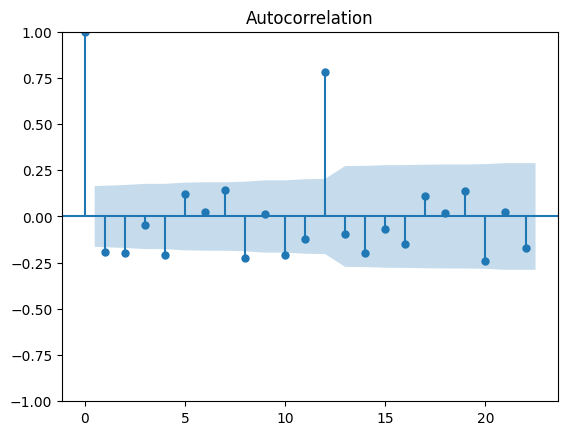

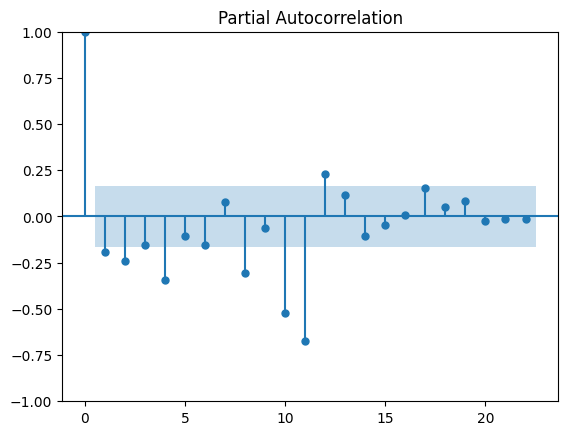

In [186]:
acf2 = plot_acf(airline['Passengers second difference'].dropna())
pacf2 = plot_pacf(airline['Passengers second difference'].dropna(),method='ywm')

In [187]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(12,2,12))

d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [188]:
model_Arima_fit=model_ARIMA.fit()

d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [189]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(12, 2, 12)   Log Likelihood                -306.223
Date:                     Thu, 24 Aug 2023   AIC                            662.445
Time:                             22:56:41   BIC                            722.613
Sample:                         01-01-1949   HQIC                           686.602
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3294      0.813     -0.405      0.685      -1.923       1.264
ar.L2         -0.5924      0.749     -0.791      0.429      -2.060       0.875
ar.L3         -0.3796      0.771     -0.492      0.622      -1.891       1.131
ar.L4         -0.5011      0.716     -0.700      0.484      -1.904       0.902
ar.L5         -0.4702      0.750     -0.627      0.531      -1.940       1.000
ar.L6         -0.3758      0.789     -0.476      0.634      -1.922       1.170
ar.L7         -0.5336      0.657     -0.812      0.417      -1.821       0.754
ar.L8         -0.4415      0.763     -0.579      0.563      -1.936       1.053
ar.L9         -0.5141      0.722     -0.712      0.477      -1.930       0.902
ar.L10        -0.4536      0.769     -0.590      0.555      -1.961       1.053
ar.L11        -0.3804      0.712     -0.534      0.593      -1.777       1.016
ar.L12         0.3539      0.659      0.537      0.591      -0.938       1.646
ma.L1         -0.8651      0.923     -0.937      0.349      -2.675       0.945
ma.L2          0.2990      1.093      0.274      0.784      -1.844       2.442
ma.L3         -0.4680      1.190     -0.393      0.694      -2.801       1.865
ma.L4          0.2880      1.283      0.224      0.822      -2.227       2.803
ma.L5         -0.0174      1.430     -0.012      0.990      -2.821       2.786
ma.L6         -0.2217      1.473     -0.151      0.880      -3.108       2.665
ma.L7          0.4035      1.289      0.313      0.754      -2.123       2.930
ma.L8         -0.5164      1.079     -0.479      0.632      -2.630       1.598
ma.L9          0.6574      0.816      0.805      0.421      -0.942       2.257
ma.L10        -0.5796      0.616     -0.940      0.347      -1.788       0.629
ma.L11         0.2752      0.486      0.566      0.571      -0.678       1.228
ma.L12        -0.1914      0.387     -0.495      0.621      -0.950       0.567
sigma2        77.0333     26.998      2.853      0.004      24.119     129.948
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.84   Prob(JB):                         0.36
Heteroskedasticity (H):               2.23   Skew:                             0.38
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [190]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [191]:
prediction = model_Arima_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers'] - prediction

residuals

Month
1956-01-01     -2.353327
1956-02-01     -4.367785
1956-03-01     20.001975
1956-04-01      4.122648
1956-05-01      7.054429
1956-06-01     22.091720
1956-07-01     13.546638
1956-08-01     32.670998
1956-09-01      9.948754
1956-10-01     -1.498890
1956-11-01     -5.537185
1956-12-01     -2.392564
1957-01-01     -6.934493
1957-02-01     -7.573634
1957-03-01     33.222923
1957-04-01     13.499459
1957-05-01     14.222432
1957-06-01     37.432566
1957-07-01     39.457588
1957-08-01     64.374877
1957-09-01     31.269911
1957-10-01      6.304556
1957-11-01     -8.302634
1957-12-01     -2.770817
1958-01-01    -14.393522
1958-02-01    -19.403788
1958-03-01     14.556603
1958-04-01    -13.326133
1958-05-01     -7.797627
1958-06-01     19.326122
1958-07-01     38.153182
1958-08-01     73.578245
1958-09-01      2.518774
1958-10-01    -14.409609
1958-11-01    -39.666567
1958-12-01    -33.310288
1959-01-01    -25.511086
1959-02-01    -24.834564
1959-03-01     33.583935
1959-04-01      7.4

<AxesSubplot:xlabel='Month'>

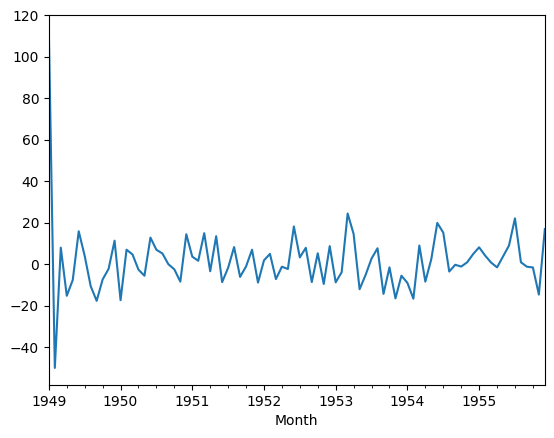

In [192]:
model_Arima_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

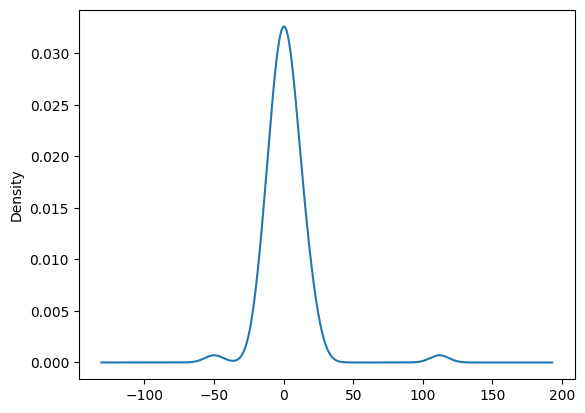

In [193]:
model_Arima_fit.resid.plot(kind='kde')

In [194]:
test_data['Predicted_ARIMA'] = prediction

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11288\37139630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = prediction


<AxesSubplot:xlabel='Month'>

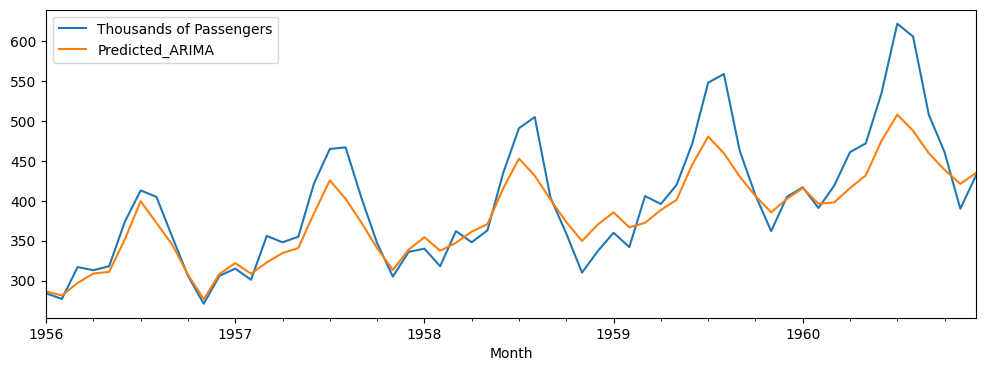

In [195]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot(figsize=(12,4))

d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


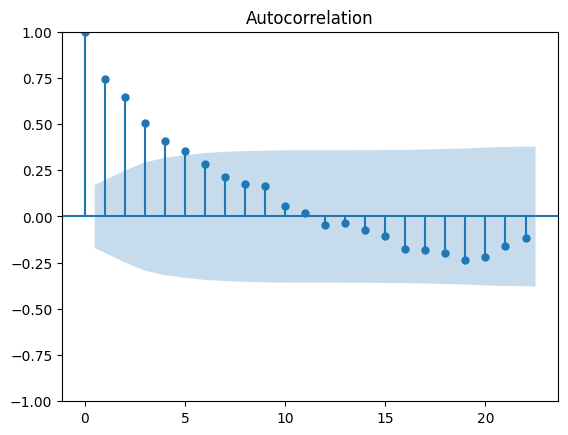

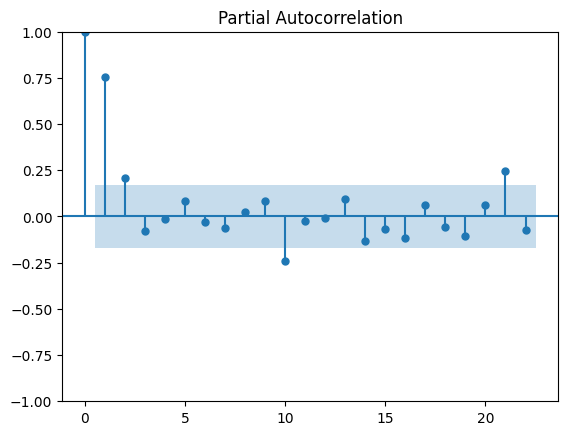

In [196]:
acf12 = plot_acf(airline['Passengers 12 diffenence'].dropna())
pacf12 = plot_pacf(airline['Passengers 12 diffenence'].dropna())

In [197]:
# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [198]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5), seasonal_order=(0,1,0,12))

d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [199]:
model_SARIMAX_fit = model_SARIMAX.fit()

d:\anaconda\envs\Deep_Learning\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [200]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 24 Aug 2023   AIC                            548.481
Time:                                     22:56:45   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1837      1.165      0.158      0.875      -2.099       2.467
ma.L2         -0.5341      1.263     -0.423      0.672      -3.009       1.940
ma.L3         -0.0986      0.384     -0.257      0.798      -0.852       0.655
ma.L4         -0.1273      0.338     -0.377      0.706      -0.789       0.535
ma.L5          0.2471      0.357      0.693      0.489      -0.452       0.947
sigma2        87.7323     81.217      1.080      0.280     -71.451     246.915
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [201]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [202]:
pred_SARIMAX = model_SARIMAX_fit.predict(start=pred_start_date, end=pred_end_date)
test_data['Pred_SARIMAX'] = pred_SARIMAX

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11288\3532124488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Pred_SARIMAX'] = pred_SARIMAX


In [203]:
residuals = test_data['Thousands of Passengers'] - pred_SARIMAX
residuals

Month
1956-01-01     -2.184793
1956-02-01     -4.277433
1956-03-01      7.083579
1956-04-01      2.323536
1956-05-01      6.665437
1956-06-01     19.050824
1956-07-01      9.602799
1956-08-01     19.929765
1956-09-01      5.555569
1956-10-01     -4.216910
1956-11-01     -1.562809
1956-12-01     -6.434417
1957-01-01     -4.955903
1957-02-01    -13.009835
1957-03-01     14.013334
1957-04-01      6.212605
1957-05-01     13.208787
1957-06-01     37.483313
1957-07-01     32.676961
1957-08-01     53.830762
1957-09-01     27.082239
1957-10-01     10.080944
1957-11-01      6.342316
1957-12-01     -1.808129
1958-01-01     -4.742385
1958-02-01    -20.120391
1958-03-01     -3.531080
1958-04-01    -16.697028
1958-05-01     -1.156379
1958-06-01     28.715305
1958-07-01     37.431516
1958-08-01     71.147906
1958-09-01      6.900082
1958-10-01      2.429479
1958-11-01     -7.830065
1958-12-01    -19.479370
1959-01-01     -2.955751
1959-02-01    -13.860087
1959-03-01     23.166406
1959-04-01     14.4

<AxesSubplot:xlabel='Month'>

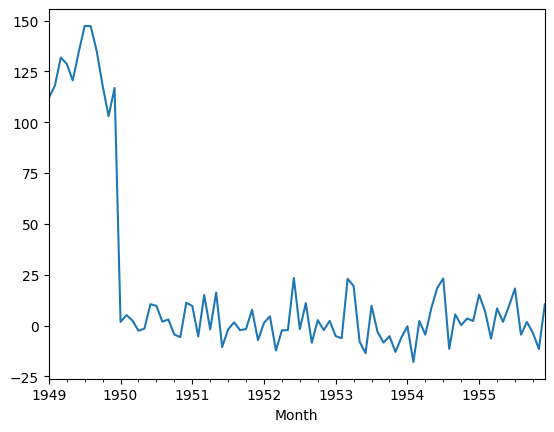

In [204]:
model_SARIMAX_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

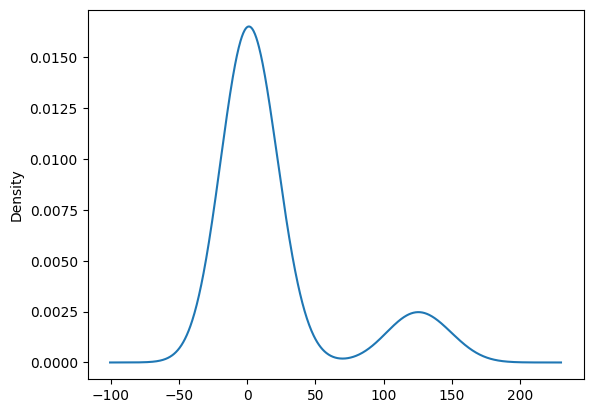

In [205]:
model_SARIMAX_fit.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

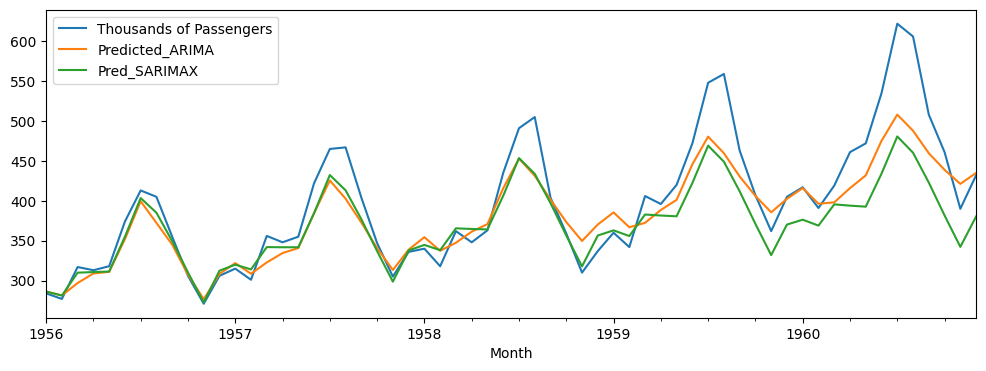

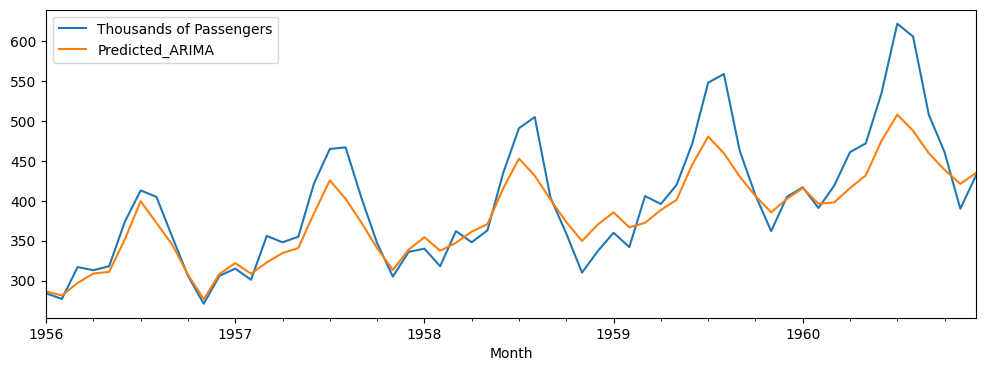

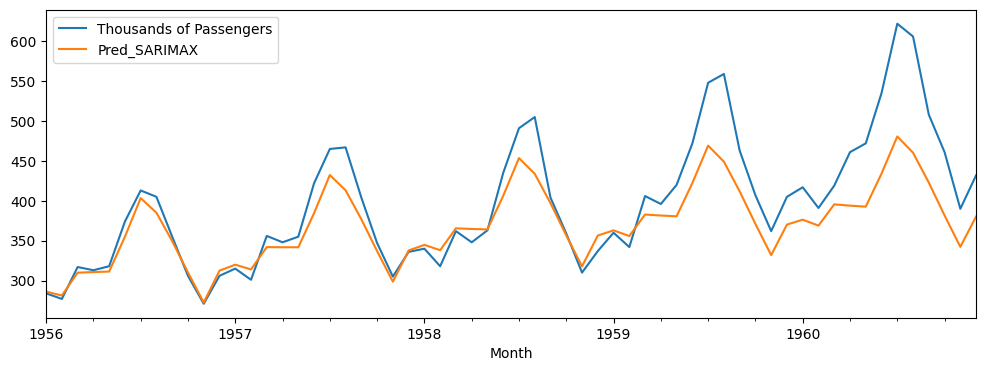

In [209]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA', 'Pred_SARIMAX']].plot(figsize=(12,4))
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot(figsize=(12,4))
test_data[['Thousands of Passengers', 'Pred_SARIMAX']].plot(figsize=(12,4))